In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg
from scipy import optimize

# Метод разделимых наименьших квадратов. Квантовые дефекты

## Постановка задачи:

Методом разделимых наименьших квадратов построить модель вида:
$$y = \beta_1 - \beta_2x - (\frac{\arctan{\frac{\beta_3}{x - \beta_4}}}{\pi})$$

для данных из исследований квантовых дефектов в атомах йода. Предиктор $x$ - возбужденное состояние энергии, переменная отклика $y$ - число квантовых дефектов.

x = [-4868.68,-4868.09,-4867.41,
-3375.19,-3373.14,-3372.03,
-2473.74,-2472.35,-2469.45,
-1894.65,-1893.40,-1497.24,
-1495.85,-1493.41,-1208.68,
-1206.18,-1206.04,-997.92,
-996.61,-996.31,-834.94,
-834.66,-710.03,-530.16,
-464.17]

y = [0.252429,0.252141,0.251809,
0.297989,0.296257,0.295319,
0.339603,0.337731,0.333820,
0.389510,0.386998,0.438864,
0.434887,0.427893,0.471568,
0.461699,0.461144,0.513532,
0.506641,0.505062,0.535648,
0.533726,0.568064,0.612886,
0.624169]

## Ввод исходных данных:

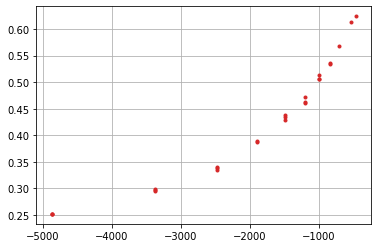

In [8]:
x = np.array([-4868.68,-4868.09,-4867.41,-3375.19,-3373.14,-3372.03,-2473.74,-2472.35,-2469.45,-1894.65,-1893.40,-1497.24,-1495.85,-1493.41,-1208.68,-1206.18,-1206.04,-997.92,-996.61,-996.31,-834.94,-834.66,-710.03,-530.16,-464.17])
y = np.array([0.252429,0.252141,0.251809,0.297989,0.296257,0.295319,0.339603,0.337731,0.333820,0.389510,0.386998,0.438864,0.434887,0.427893,0.471568,0.461699,0.461144,0.513532,0.506641,0.505062,0.535648,0.533726,0.568064,0.612886,0.624169])
plt.plot(x,y,'.',color='tab:red')
plt.grid()
pass

## Нелинейный метод наименьших квадратов:

In [11]:
def funk(x,b1,b2,b3,b4):
    return b1-b2*x - (np.arctan(b3/(x-b4))/math.pi)
funk(1,3,4,5,5)

-0.7147767125227227

In [17]:
res,_ = optimize.curve_fit(funk,x,y)
b1,b2,b3,b4 = res;
b1,b2,b3,b4

(0.2019684894050175,
 -6.1953246821417266e-06,
 1204.4563632015252,
 -181.343091966604)

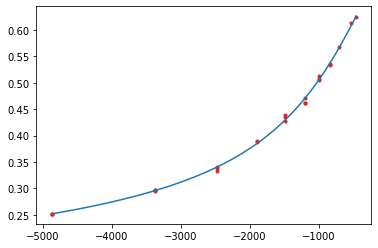

In [24]:
xx = np.linspace(np.min(x),np.max(x),100)
yy = b1-b2*xx - (np.arctan(b3/(xx-b4))/math.pi)
plt.plot(x,y,'.',color='tab:red')
plt.plot(xx,yy)
pass

## Апроксимация квадратным многочленом
$$ y = \beta_0 + \beta_1x+\beta_2x^2 $$

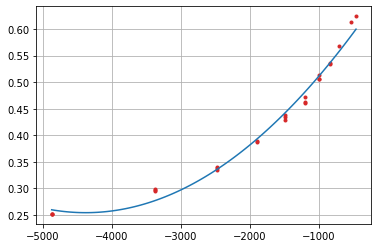

In [25]:
beta2, beta1, beta0 = np.polyfit(x,y,2)
X = np.linspace(np.min(x),np.max(x), 100)
Y = beta0 + beta1 * X + beta2*(X**2)
plt.plot(x,y,'.',color='tab:red')
plt.plot(X,Y)
plt.grid()
pass

Из графиков видно, что апроксимация данных нелинейным методом наименьших квадратов точнее, чем апроксимация квадратным многочленом